Zadanie 1 (4 pkt)
Przeprowadź test T studenta na danych w pliku wyniki.csv
Hipoteza zerowa brzmi: nie ma istotnej różnicy w Ocenie końcowej pomiędzy uczniami i uczennicami.
Hipoteza alternatywna brzmi: istnieje istotna różnica (bez wskazania kierunku) w Ocenie końcowej pomiędzy uczniami i uczennicami.


Przyjmij significance level (alpha) na poziomie 0.05. Czy uda się odrzucić hipotezę zerową?
Pomocne wideo: https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-quantitative-means/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means - przeprowadzanie testu dla dwóch zmiennych.


In [2]:
import pandas as pd

file_path = 'wyniki.csv'
data = pd.read_csv(file_path)

data.head()


,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10


In [7]:
import scipy as sc
female_scores = data[data['plec'] == 'F']['ocena_koncowa']
male_scores = data[data['plec'] == 'M']['ocena_koncowa']

t_stat, p_value = sc.stats.ttest_ind(female_scores, male_scores, equal_var=False)



In [9]:
t_stat, p_value  # Statystyka testowa, wartość p > 0.05, więc nie ma podstaw do odrzucenia hipotezy zerowej

(-1.9386213026002415, 0.05334760933558723)

Zadanie 2 (2 pkt)
Korzystając z danych w pliku ZyskiFirmyX.csv stwórz model regresji liniowej i biblioteki statmodels:

●	Wyświetl wykres pokazujący zyski w czasie.

●	Czy da się zaobserwować trend? Jaki?

●	Wyświetl podsumowanie modelu.


In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('ZyskiFirmyX.csv')

data.tail()

,Rok,Zysk
195,2016,988
196,2017,895
197,2018,-178
198,2019,543
199,2020,316


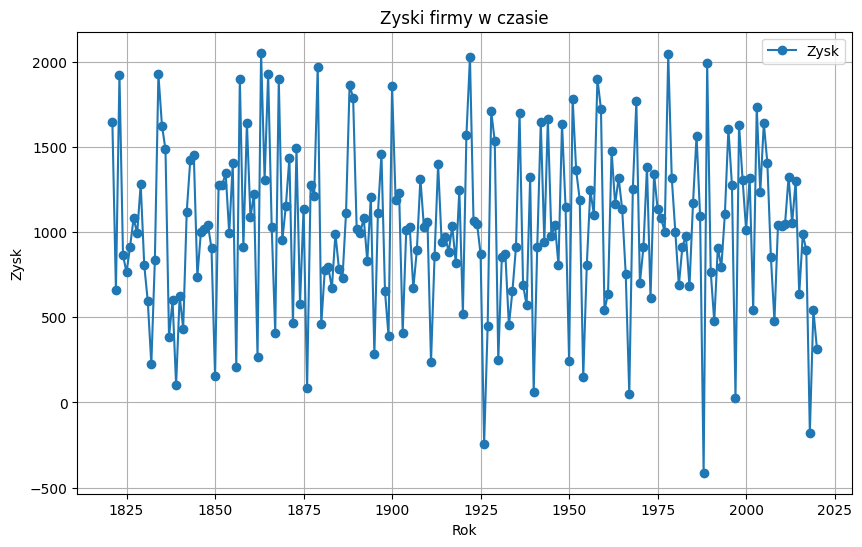

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Zysk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.09357
Date:                Sat, 21 Dec 2024   Prob (F-statistic):              0.760
Time:                        21:10:01   Log-Likelihood:                -1521.3
No. Observations:                 200   AIC:                             3047.
Df Residuals:                     198   BIC:                             3053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1373.8795   1150.888      1.194      0.234    -895.692    3643.452
Rok           -0.1832      0.599     -0.306      0.760      -1.364       0.998
==============================================================================
Omnibus:                        0.585   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.628
Skew:                          -0.128   Prob(JB):                        0.730
Kurtosis:                       2.900   Cond. No.                     6.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data['Rok'], data['Zysk'], marker='o', label='Zysk')
plt.title('Zyski firmy w czasie')
plt.xlabel('Rok')
plt.ylabel('Zysk')
plt.grid()
plt.legend()
plt.show()

X = sm.add_constant(data['Rok'])
y = data['Zysk']
model = sm.OLS(y, X).fit()

#  podsumowanie modelu
model_summary = model.summary()
model_summary

# ciężko o wyznaczenie trendu, ponieważ każdy rok wykazuje znaczne wachania względem poprzedzających lat

Zadanie 3 (6 pkt)
Korzystając z danych w pliku spendingscores.csv i biblioteki statmodels:
1.	stwórz model regresji liniowej, gdzie zmienną zależną jest Spending score, a zmiennymi niezależnymi pozostałe zmienne.
2.	Z modelu wyświetl:
a.	p values
b.	standard dev
c.	coefficients
3.	Sprawdź czy istnieje korelacja pomiędzy zmiennymi. Pokaż to na wykresie, np. z biblioteki plotly express.
4.	Korzystając z eliminacji wstecznej usuń najmniej istotną zmienną i jeszcze raz wyświetl model.
UWAGA: zwróć uwagę na zmienne będące kategoriami!


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS, add_constant

data = pd.read_csv('spendingscores.csv')

data.head()


,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [28]:
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)
data_encoded['Gender_Male'] = data_encoded['Gender_Male'].astype(int)
X = data_encoded.drop(columns=['SpendingScore'])
y = data_encoded['SpendingScore']

X = add_constant(X) #β0

regression_model = OLS(y, X).fit()

print("Wyniki modelu:")
print(regression_model.summary())

Wyniki modelu:
                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           4.91e-05
Time:                        21:32:23   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           73.9300      6.64

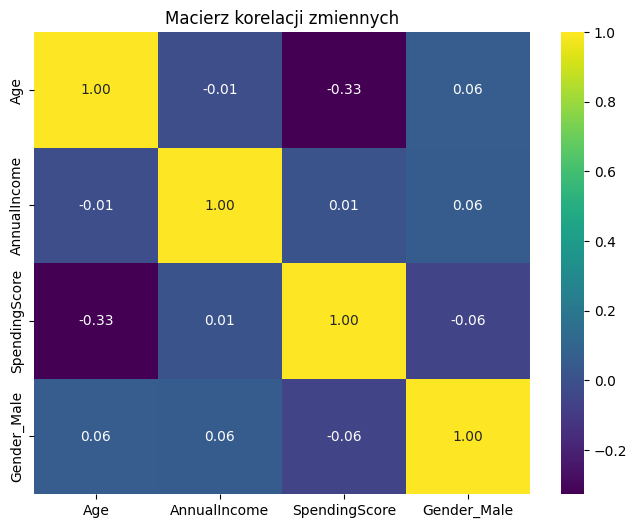

In [29]:
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", cbar=True)
plt.title("Macierz korelacji zmiennych")
plt.show()

In [30]:
# najwieksze  P>|t| ma zmienna AnnualIncome  0.905
X_reduced = X.drop(columns=['AnnualIncome'])

model_reduced = OLS(y, X_reduced).fit()

print("Wyniki nowego modelu po eliminacji zmiennej:")
print(model_reduced.summary())

Wyniki nowego modelu po eliminacji zmiennej:
                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     11.99
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.22e-05
Time:                        21:42:46   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1850.
Df Residuals:                     197   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const